In [187]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob
import sys
import tifffile

In [173]:
datadir = "/home/kmatsuura/countcell/data/b"

In [167]:
glob.glob(datadir+"/*.tif")

['/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-2.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-6.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-8.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-4.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-5.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-0.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-7.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-9.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-3.tif',
 '/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-1.tif']

# test

In [45]:
filename = "200205_SG1_DM_Image000_ch01-0.tif"
filepath = os.path.join(datadir, filename)

In [46]:
filepath

'/home/kmatsuura/countcell/data/b/200205_SG1_DM_Image000_ch01-0.tif'

In [47]:
image = tifffile.imread(filepath)

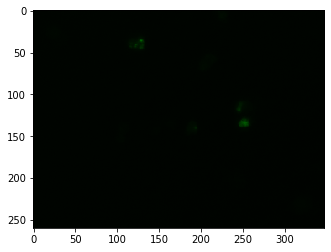

In [48]:
plt.imshow(image)

In [49]:
image = np.array(image)

In [50]:
imagegreen = image[:,:,1]

In [79]:
imagegreenbright = (imagegreen-1)*20

In [1]:
fig = plt.figure(figsize=(15,15))

NameError: name 'plt' is not defined

In [97]:
imagegreen.shape

(260, 348)

In [111]:
region = np.zeros(imagegreen.shape,int)

In [127]:
np.mean(imagegreen)

4.007261273209549

In [164]:
threshhold = np.mean(imagegreen) + 1
region = np.zeros(imagegreen.shape,int)
for i in range(imagegreen.shape[0]):
    for j in range(imagegreen.shape[1]):
        if imagegreen[i][j] > threshhold:
            region[i][j] = 1

In [2]:
plt.imshow(region)
plt.savefig("test.png")

NameError: name 'plt' is not defined

In [154]:
region2 = np.zeros(imagegreen.shape,int)
for i in range(region.shape[0]):
    for j in range(region.shape[1]-4):
        if region[i][j] + region[i][j+1] + region[i][j+2] + region[i][j+3] + region[i][j+4] >= 4:
            region2[i][j] = 1

In [3]:
plt.imshow(region2)

NameError: name 'plt' is not defined

In [156]:
region3 = np.zeros(imagegreen.shape,int)
for i in range(region2.shape[1]):
    for j in range(region2.shape[0]-4):
        if region2[j][i] + region2[j+1][i] + region2[j+2][i] + region2[j+3][i] + region2[j+4][i] >= 4:
            region3[j][i] = 1

In [4]:
plt.imshow(region3)

NameError: name 'plt' is not defined

In [185]:
os.path.exists(datadir)

True

In [198]:
def gazouhenkan(inputdir, outputdir):
    if not os.path.exists(outputdir): #outputdirのパスが存在しなければ作る。
        os.mkdir(outputdir)
        
    def gazousyori(fpath):
        image = tifffile.imread(fpath)
        imagegreen = image[:,:,1]
        imagegreenbright = (imagegreen-1)*20
        
        threshhold = np.mean(imagegreen) + 1
        region = np.zeros(imagegreen.shape,int)
        for i in range(imagegreen.shape[0]):
            for j in range(imagegreen.shape[1]):
                if imagegreen[i][j] > threshhold:
                    region[i][j] = 1
                
        region2 = np.zeros(imagegreen.shape,int)
        for i in range(region.shape[0]):
            for j in range(region.shape[1]-4):
                if region[i][j] + region[i][j+1] + region[i][j+2] + region[i][j+3] + region[i][j+4] >= 4:
                    region2[i][j] = 1
                    
        region3 = np.zeros(imagegreen.shape,int)
        for i in range(region2.shape[1]):
            for j in range(region2.shape[0]-4):
                if region2[j][i] + region2[j+1][i] + region2[j+2][i] + region2[j+3][i] + region2[j+4][i] >= 4:
                    region3[j][i] = 1
        return region3
    
    def save(image, fpath, outputdir):
        fname = fpath.split(inputdir+"/")[1].replace(".tif",".png")
        outputpath = os.path.join(outputdir, fname)
        plt.imshow(image)
        plt.savefig(outputpath)
        print('save:', fname)
        return save
    
    filelist = glob.glob(inputdir + "/*.tif")
    for fpath in filelist:
        outputimage = gazousyori(fpath)
        save(outputimage, fpath, outputdir)
        

In [5]:
gazouhenkan(datadir,"/home/kmatsuura/countcell/data/henkan")

NameError: name 'gazouhenkan' is not defined